In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import  warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

#### Check For Missing Values

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in dataset.

#### Check For Duplicates

In [9]:
df.duplicated().sum()

0

There are no duplicates in dataset

#### Check DataTypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking number of unique values of each column.

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check statistics of dataset

In [16]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numeric_feature),numeric_feature))
print("We have {} categorical features: {}".format(len(categorical_feature),categorical_feature))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
df['Total Score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['Average Score'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
math_full = df[df['math_score']==100]['Average Score'].count()
reading_full = df[df['reading_score']==100]['Average Score'].count()
writing_full = df[df['writing_score']==100]['Average Score'].count()

print(f"Number of student who got 100 marks in Maths: {math_full}")
print(f"Number of student who got 100 marks in Reading: {reading_full}")
print(f"Number of student who got 100 marks in Writing: {writing_full}")


Number of student who got 100 marks in Maths: 7
Number of student who got 100 marks in Reading: 17
Number of student who got 100 marks in Writing: 14


In [28]:
math_less = df[df['math_score']<=20]['Average Score'].count()
reading_less = df[df['reading_score']<=20]['Average Score'].count()
writing_less = df[df['writing_score']<=20]['Average Score'].count()

print(f"Number of student who got less than 20 marks in Maths: {math_less}")
print(f"Number of student who got less than 20 marks in Reading: {reading_less}")
print(f"Number of student who got less than 20 marks in Writing: {writing_less}")

Number of student who got less than 20 marks in Maths: 4
Number of student who got less than 20 marks in Reading: 1
Number of student who got less than 20 marks in Writing: 3


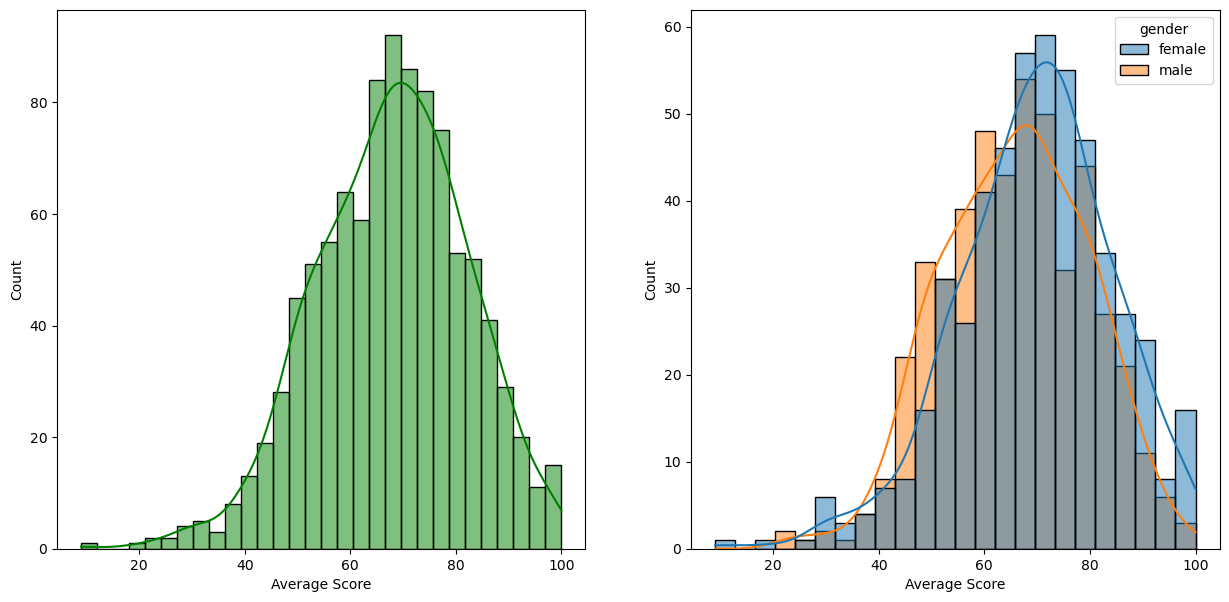

In [42]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average Score', bins=30, color='g', kde=True)
plt.subplot(122)
sns.histplot(data=df, x="Average Score", hue='gender', kde=True)
plt.show()